In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [80]:
def load_data():
  with open('data0.txt') as f:
    return np.array([list(map(int, l.strip().split(' '))) for l in f.readlines()])
data = load_data()
X, y = data[:, :2], data[:, 2]

In [116]:
def multiclass_perceptron(X, y):
  n_classes = len(np.unique(y))
  w = np.zeros((n_classes, 2))
  b = np.zeros(n_classes)
  ep = 0
  while True:
#     print(ep)
    # Go through all
    is_any_misclassified = False
    for i in range(len(X)):
      label = y[i]
      x = X[i]
      pred = np.argmax(w @ x + b)
      if pred != label:
        is_any_misclassified = True
        w[pred] = w[pred] - x
        b[pred] = b[pred] - 1
        w[label] = w[label] + x
        b[label] = b[label] + 1
    if not is_any_misclassified:
      print('No more misclassification at epoch', ep)
      break
    ep += 1
  return w, b
      

In [117]:
w, b = multiclass_perceptron(X,y)

No more misclassification at epoch 32


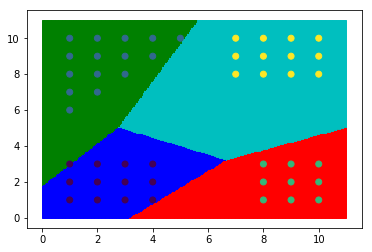

In [140]:
minx, maxx = min(X[:,0]), max(X[:,0])
miny, maxy = min(X[:,1]), max(X[:,1])

cols = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

ax = plt.gca()
step = 0.05
for i in np.arange(0, 11, step):
  for j in np.arange(0, 11, step):
    x = [i,j]
    pred = np.argmax(w @ x + b)
    rect = Rectangle((i,j), step, step, color=cols[pred])
    ax.add_patch(rect)
    
ax.scatter(X[:,0], X[:,1], c=y, zorder=5)
plt.show()